In [1]:
import os
from os.path import join as j
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
VOC = '/data/ships/ShipRSImageNet_V1/VOC_Format/'
anno_folder = j(VOC, 'Annotations')
img_folder = j(VOC, 'JPEGImages')

In [3]:
test = os.listdir(anno_folder)[1]

tree = ET.parse(j(anno_folder, test))

In [4]:
root = tree.getroot()

In [13]:
from anytree import Node, RenderTree

root_node = Node(['root', 0]) 
all_nodes = {
    0: {},
    1: {},
    2: {},
    3: {},
}

In [14]:
levels = [0, 1, 2, 3]
n_ships = 0

for file in os.listdir(anno_folder):
    root = ET.parse(j(anno_folder, file)).getroot()
    for child in root:
        if child.tag == 'object':
            n_ships += 1
            
            name = child.find('name').text
            
            level_nums = []
            for level in levels:
                num = child.find(f'level_{level}').text
                if level == levels[-1]: num = (num, name)
                level_nums.append(num)
            
            # tmp = all_nodes[0].get(level_nums[0], None) or Node([level_nums[0], 0], parent=root_node)
            # tmp.name[1] += 1
            # all_nodes[0][level_nums[0]] = tmp

            for level in levels:
                parent = root_node

                if level != 0:
                    parent=all_nodes[level-1][level_nums[level - 1]]
                
                tmp = all_nodes[level].get(level_nums[level], None) or Node([level_nums[level], 0], parent=parent)
                tmp.name[1] += 1
                all_nodes[level][level_nums[level]] = tmp





In [15]:
n_ships

13963

In [16]:
for pre, fill, node in RenderTree(root_node):
    print("%s%s" % (pre, node.name))

['root', 0]
├── ['1', 13065]
│   ├── ['2', 5858]
│   │   ├── ['5', 335]
│   │   │   └── [('8', 'Ticonderoga'), 335]
│   │   ├── ['11', 394]
│   │   │   ├── [('29', 'Other Auxiliary Ship'), 78]
│   │   │   ├── [('33', 'AOE'), 48]
│   │   │   ├── [('34', 'Masyuu AS'), 36]
│   │   │   ├── [('35', 'Sanantonio AS'), 61]
│   │   │   ├── [('32', 'Training Ship'), 42]
│   │   │   ├── [('36', 'EPF'), 52]
│   │   │   ├── [('30', 'Medical Ship'), 27]
│   │   │   └── [('31', 'Test Ship'), 50]
│   │   ├── ['2', 1171]
│   │   │   └── [('2', 'Other Warship'), 1171]
│   │   ├── ['8', 139]
│   │   │   └── [('17', 'Patrol'), 139]
│   │   ├── ['6', 1209]
│   │   │   ├── [('9', 'Other Destroyer'), 217]
│   │   │   ├── [('12', 'Hatsuyuki DD'), 110]
│   │   │   ├── [('10', 'Atago DD'), 208]
│   │   │   ├── [('11', 'Arleigh Burke DD'), 526]
│   │   │   ├── [('14', 'Asagiri DD'), 62]
│   │   │   └── [('13', 'Hyuga DD'), 86]
│   │   ├── ['3', 837]
│   │   │   └── [('3', 'Submarine'), 837]
│   │   ├── ['10', 12

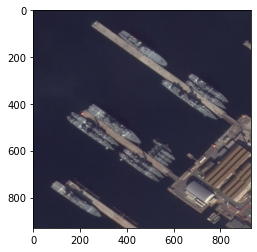

In [30]:
from PIL import Image

im = Image.open(j(img_folder, f"{test[:-4]}.bmp"))

plt.imshow(im)

In [4]:
d = {'test1': 'a'}

d['test1'] = d.get('test1', None) or 'b'
d

{'test1': 'a'}

In [27]:
root_node.name

'root'

In [22]:
for split in [1, 2, 3, 4]:
    start = f'/data/fgvc_aircraft/fgvc-aircraft-2013b/data/splits/split{split}/'
    id_train = start + 'ID_trainset.txt'
    id_test = start + "ID_testset.txt"
    ood_test = start + "OOD_testset.txt"

    with open(id_train, 'r') as infile:
        print(len(infile.readlines()))

    with open(id_test, 'r') as infile:
        print(len(infile.readlines()))

    with open(ood_test, 'r') as infile:
        print(len(infile.readlines()))

    print("="*10)



5266
2634
2100
5334
2666
2000
5201
2599
2200
5334
2666
2000


In [19]:
13000/4

3250.0

In [23]:
from glob import glob


In [25]:
glob("/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_*")

['/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj6_Yacht.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj3_Yacht.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj0_Motorboat.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj5_Yacht.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj2_Dock.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj1_Dock.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj7_Cargo.jpg',
 '/data/ships/nate/ShipRSImageNet/VOC_Format/chips/004089_obj4_Yacht.jpg']

In [36]:
import re

root_dir = '/data/ships/nate/ShipRSImageNet/VOC_Format/'
chips = root_dir + "chips/"

with open(root_dir + 'ImageSets/train.txt', 'r') as infile:
    n = 0
    for line in infile.readlines():
        line, _ = os.path.splitext(line.strip())
        matching_chips = [f for f in os.listdir(chips) if re.match(fr"{line}_*", f)]
        n += len(matching_chips)
    print(n)

with open(root_dir + 'ImageSets/val.txt', 'r') as infile:
    n = 0
    for line in infile.readlines():
        line, _ = os.path.splitext(line.strip())
        matching_chips = [f for f in os.listdir(chips) if re.match(fr"{line}_*", f)]
        n += len(matching_chips)
    print(n)

10860
3103


In [39]:
variants_file = os.path.join(root_dir, 'variants.txt')


names_to_class = {}
with open(variants_file, 'r') as variants_file:
    lines = variants_file.readlines()
    for line in lines:
        line = line.rstrip().split(' ')
        names_to_class["".join(line[:-1])] = int(line[-1])
    

In [52]:
to_remove = [4, 5, 6]
s = set(names_to_class.values()) - set(to_remove)
seen = {0}


In [49]:
s

{1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}

In [55]:
ret = {}
for item in sorted(list(s)):
    ret[item] = max(seen) + 1
    seen.add(max(seen) + 1)

ret

{1: 1,
 2: 2,
 3: 3,
 7: 4,
 8: 5,
 9: 6,
 10: 7,
 11: 8,
 12: 9,
 13: 10,
 14: 11,
 15: 12,
 16: 13,
 17: 14,
 18: 15,
 19: 16,
 20: 17,
 21: 18,
 22: 19,
 23: 20,
 24: 21}

In [53]:
sorted(list(s))

[1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

ImportError: attempted relative import with no known parent package